# **Project Title : Online Retail Customer Segementation (EDA, RFM, KMEANS)**

**BUSINESS UNDERSTANDING**

E-commerce has become a new channel to support businesses development by providing cheaper and more efficient distribution channels for their products or services. But, there are more trade competitors of the retail industry. The company must be recognize to understand its customer segmentation and marketing strategies accordingly


**PROBLEM STATEMENT**

On this Project we will distinguish customer into several groups to determine the appropriate treatment for the customer group so as to increase the sense of customer satisfaction and customer confidence in the company


**MODELLING TASK**

*   Task : Clustering
*   Model used : RFM Analyze & K - MEANS Clustering
*   Cluster Evaluation : Elbow Methode

dataset : [link text](https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset)

# Import Package

In [1]:
import warnings
warnings.filterwarnings('ignore')
from numpy import math


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Dibimbing/online_retail.csv')
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


**Description**

*   InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
*   StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction. Numeric.
*   InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
*   UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
*   CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
*   Country: Country name. Nominal. The name of the country where a customer resides.


# Data Understanding

In [ ]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

# Data Preprocessing

## Check Null and Missing Values

In [ ]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,CustomerID,135080,24.93
1,Description,1454,0.27


**There are null values in CustomerID (We need to remove them as there is no way we can get the number of CustomerID) and Description.**

In [ ]:
df.dropna(inplace=True)

In [ ]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage


**Success removing NULL values!**

In [ ]:
df.shape

(406829, 8)

## Duplicated data check

In [ ]:
df.duplicated().sum()

5225

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

**Duplicated rows have gone**

### Date Time Manipulation

In [ ]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [ ]:
# extracting month from the Invoice date
df['Month'] = df['InvoiceDate'].dt.month_name()

In [ ]:
# extracting day from the Invoice date
df['Day'] = df['InvoiceDate'].dt.day_name()

In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday


# Statistical Summary

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


**Observation:**

- The min value for Quantity is 80995, this could represent cancelled or returned orders.
- The UnitPrice also have few negative values which is uncommon,these transactions could represent cancelled orders by customers or bad-debt incurred by the business.

We need to clean the above values by removing from the dataset

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,December,Wednesday
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,December,Wednesday
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,December,Wednesday
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,December,Wednesday
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,December,Wednesday
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,December,Friday
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,December,Friday
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,December,Friday
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,December,Friday


Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df['cancelation_count'] = np.where(df['Quantity']<0,'canceled','complete order')

In [ ]:
len(df[df['InvoiceNo'].str.contains('C')])

8872

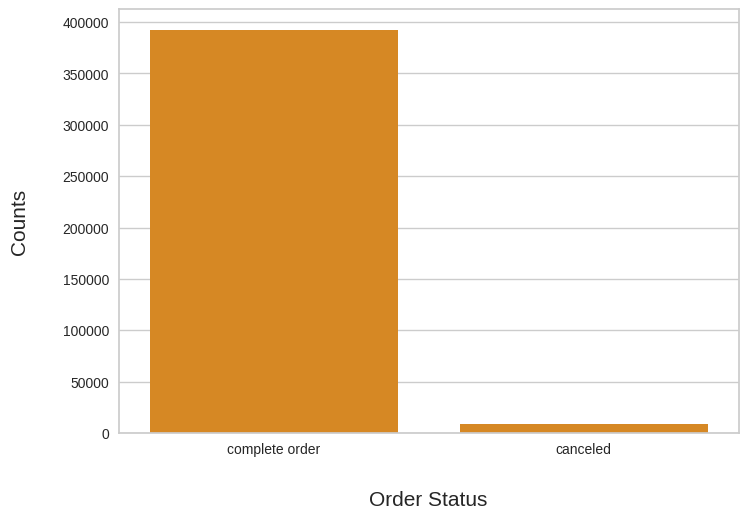

In [ ]:
cancel_count = df.groupby(['cancelation_count'],as_index=False).size()
cancel_count = cancel_count.sort_values(['size'],ascending=False)

sns.barplot(x=cancel_count['cancelation_count'],
            y=cancel_count['size'], color='#f48c06')
plt.xlabel('Order Status', fontsize=15, labelpad=24)
plt.ylabel('Counts', fontsize=15, labelpad=24);
plt.show()

In [ ]:
#Drop the InvoiceNo starts with C that means it's a cancellation.
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
len(df[df['UnitPrice']==0])

40

In [ ]:
# Unitprice values must greater than 0.
df = df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,cancelation_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,complete order
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,complete order
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df.shape

(392692, 11)

# EDA (Exploratory Data Analysis)

## Top 10 items (The most frequently purchased products)

In [ ]:
top_10_product = (df
                .groupby('Description')
                .agg(Total_Transaction=('InvoiceNo','count'))
                .reset_index()
                .sort_values('Total_Transaction',ascending=False)
                .head(10)
                )
top_10_product

,Description,Total_Transaction
3698,WHITE HANGING HEART T-LIGHT HOLDER,2016
2767,REGENCY CAKESTAND 3 TIER,1713
1762,JUMBO BAG RED RETROSPOT,1615
216,ASSORTED COLOUR BIRD ORNAMENT,1395
2345,PARTY BUNTING,1389
1943,LUNCH BAG RED RETROSPOT,1303
3001,SET OF 3 CAKE TINS PANTRY DESIGN,1152
2611,POSTAGE,1099
1935,LUNCH BAG BLACK SKULL.,1078
2269,PACK OF 72 RETROSPOT CAKE CASES,1050


Text(0.5, 1.0, 'Top 10 Highest Frequently Purchased Products')

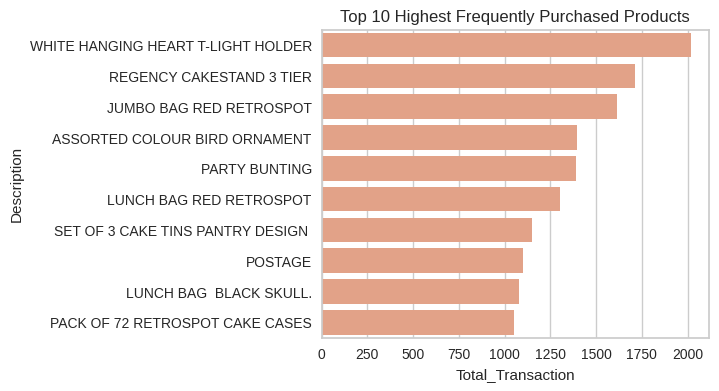

In [ ]:
# top 10 product in terms of description
plt.figure(figsize=(5,4))
sns.barplot(data = top_10_product, x = 'Total_Transaction', y ='Description', color='#f19c79')
plt.title('Top 10 Highest Frequently Purchased Products')

The most frequently purchased products is the WHITE HANGING HEART T-LIGHT HOLDER, with a total quantity of 2016 units purchased. This suggests that the WHITE HANGING HEART T-LIGHT HOLDER is a highly popular product among customers and has achieved a significant level of sales in the dataset.

## Bottom 10 items in terms of description

In [ ]:
bottom_10_product = (df
                    .groupby('Description')
                    .agg(num_trx=('InvoiceNo','count'))
                    .reset_index()
                    .sort_values('num_trx',ascending=True)
                    .head(10)
                    )
bottom_10_product

,Description,num_trx
897,CURIOUS IMAGES SCRAP BOOK SET,1
1222,FIRE POLISHED GLASS BRACELET RED,1
876,CRYSTAL CHANDELIER T-LIGHT HOLDER,1
1899,"LETTER ""W"" BLING KEY RING",1
2099,MONTANA DIAMOND CLUSTER EARRINGS,1
3660,"WALL ART,ONLY ONE PERSON",1
2225,PACK 4 FLOWER/BUTTERFLY PATCHES,1
1901,"LETTER ""Z"" BLING KEY RING",1
1406,GLASS AND PAINTED BEADS BRACELET TO,1
1711,IVORY SHELL HEART EARRINGS,1


Not so interesting to visualize, because all have single transaction.

## Top 10 Customers in money spend
We need to create a new column `total_price = Quantity * UnitPrice`. Then sum it based on group-by CustomerID.

In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,cancelation_count,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,complete order,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,complete order,22.00


In [ ]:
# create total_price column
df['total_price'] = df['Quantity'] * df['UnitPrice']

# group by aggregation
top10_cust = (df
            .groupby('CustomerID')
            .agg(total_spend=('total_price','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,CustomerID,total_spend
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194390.79
3008,16446.0,168472.50
1879,14911.0,143711.17
55,12415.0,124914.53
1333,14156.0,117210.08
3771,17511.0,91062.38
2702,16029.0,80850.84
0,12346.0,77183.60


Text(0.5, 1.0, 'Top 10 Customer with the Most Money Spend')

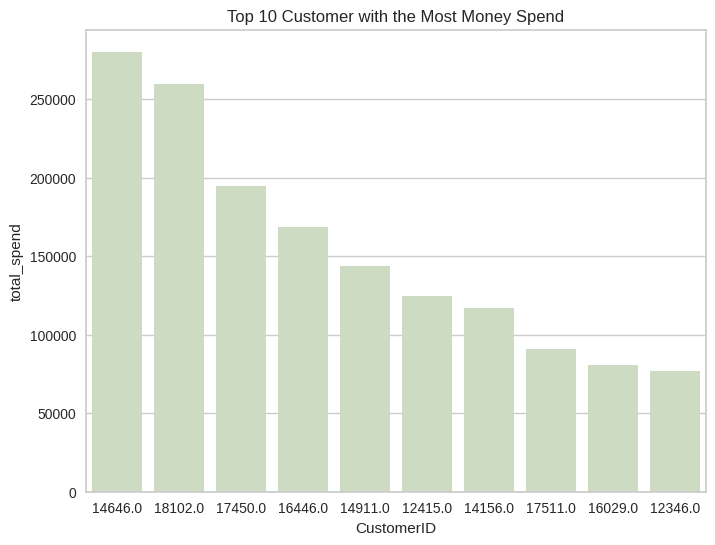

In [ ]:
# Top 10 frequent Customers
plt.figure(figsize=(8,6))
top10_cust['CustomerID'] = top10_cust['CustomerID'].astype(str)
sns.barplot(data=top10_cust, x='CustomerID', y='total_spend', color='#cbdfbd')
plt.title('Top 10 Customer with the Most Money Spend')

## Top 5 Countries

In [ ]:
top_5_countries = (df
                 .groupby('Country')
                 .agg(Customer_count=('Country','count'))
                 .reset_index()
                 .sort_values('Customer_count',ascending=False)
                 .head(5)
                 )

top_5_countries

,Country,Customer_count
35,United Kingdom,349203
14,Germany,9025
13,France,8326
10,EIRE,7226
30,Spain,2479


<Axes: xlabel='Country', ylabel='Customer_count'>

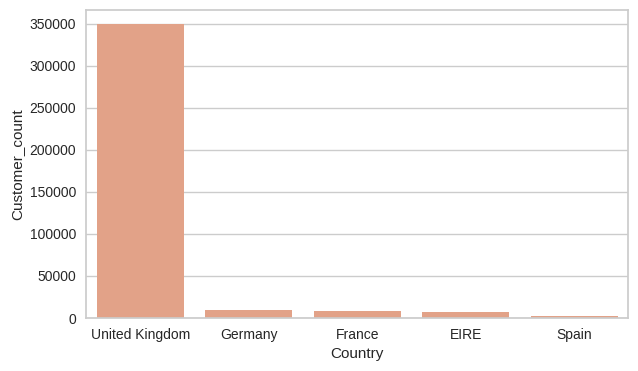

In [ ]:
# top 5 countries where max sell happens.
plt.figure(figsize=(7,4))
top_5_countries['Country'] = top_5_countries['Country'].astype(str)
sns.barplot(data=top_5_countries, x='Country', y='Customer_count', color='#f19c79')

## The Most Profitable Segment Customers

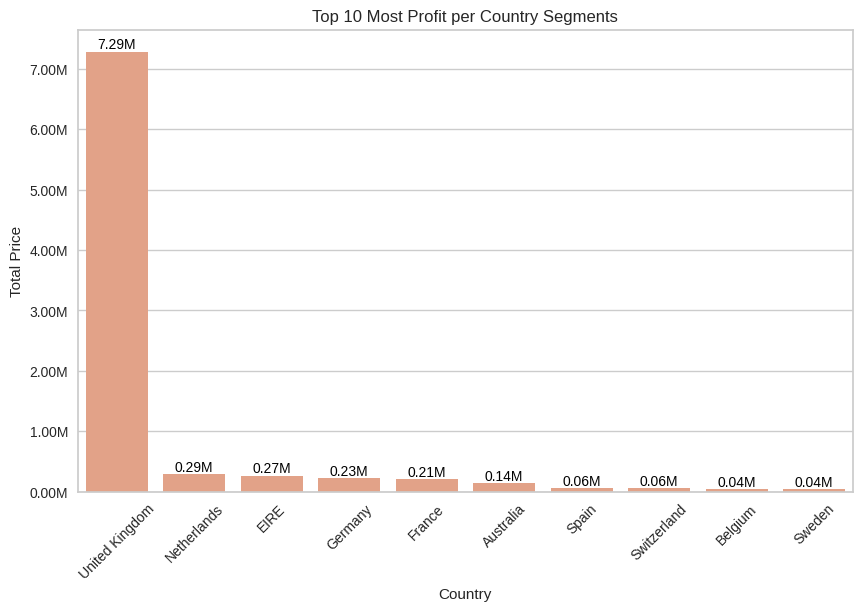

In [ ]:
# most profitable segment customers.
profit_per_segment = df.groupby('Country')['TotalPrice'].sum().reset_index()
profit_per_segment = profit_per_segment.sort_values(by='TotalPrice', ascending=False).head(10)

def format_millions(value, _):
    return f'{value/1e6:.2f}M'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Country', y='TotalPrice', data=profit_per_segment, color='#f19c79')
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format_millions(height, None), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.title('Top 10 Most Profit per Country Segments')
plt.xticks(rotation=45)
plt.show()

The United Kingdom stands out as the top-performing country in terms of profitability, generating over 7 million pounds sterling in profit. It has a substantial lead in profitability compared to other countries.

## Monthly time series of total omzet

In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,cancelation_count,TotalPrice,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,complete order,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,complete order,22.00,22.00


In [ ]:
# derive InvoiceMonth column
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,cancelation_count,TotalPrice,total_price,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,complete order,15.30,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,complete order,22.00,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34,20.34,2010-12


In [ ]:
monthly_data = (df
                .groupby('InvoiceMonth')
                .agg(num_buyer=('CustomerID','nunique'),
                     total_omzet=('total_price','sum'))
                .reset_index())

monthly_data['InvoiceMonth'] = monthly_data['InvoiceMonth'].astype(str)
monthly_data

,InvoiceMonth,num_buyer,total_omzet
0,2010-12,885,570422.730
1,2011-01,741,568101.310
2,2011-02,758,446084.920
3,2011-03,974,594081.760
4,2011-04,856,468374.331
5,2011-05,1056,677355.150
6,2011-06,991,660046.050
7,2011-07,949,598962.901
8,2011-08,935,644051.040
9,2011-09,1266,950690.202


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

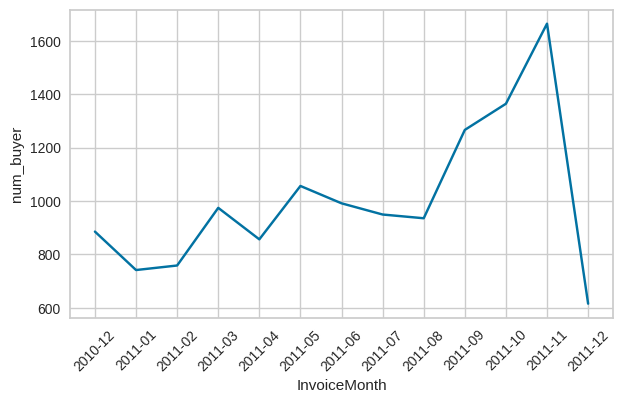

In [ ]:
# num buyer progression
plt.figure(figsize=(7,4))
sns.lineplot(data=monthly_data,
             x='InvoiceMonth',
             y='num_buyer')
plt.xticks(rotation=45)

The trend of total omzet for several months from the end of 2010 showed instability until August 2011, followed by a consistent and steady increase from September culminating in the highest total buyers in November, with a total omzet 1.156.205.

Text(0.5, 1.0, 'Profitability Trend per Month')

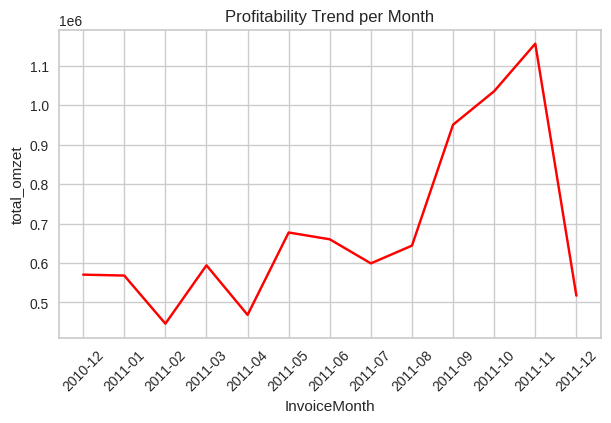

In [ ]:
# omzet progression
plt.figure(figsize=(7,4))
sns.lineplot(data=monthly_data,
             x='InvoiceMonth',
             y='total_omzet',
             color='red')
plt.xticks(rotation=45)
plt.title('Profitability Trend per Month')

The total revenue trend is directly proportional to the purchasing trend.

**OBSERVATION**


1. Analyzing the reasons behind purchase cancellations and look for strategies to reduce them and improve product descriptions or packaging if necessary.
2. Focus on top product sales: provide promotions on products with the highest demand "WHITE HANGING HEART T-LIGHT HOLDER" to boost sales.
3. Provide promotions in months when sales are slow to maintain customer interest.
4. Implement new marketing strategies on products with low demand.






# Modelling

RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique for analyzing customer value based on past buying behavior.

* **Recency (R)**
Recency refers to the time elapsed since a customer's last interaction or transaction with a company. It measures how recently a customer has engaged with the business

* **Frequency (F)**
Frequency represents the number of transaction occurs. It measures how often a customer engages with the business.

* **Monetary (M)**
Monetary refers to the total monetary value of a customer's transactions or purchases.

In [ ]:
rfm_df = df.copy()

In [ ]:
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,cancelation_count,TotalPrice,total_price,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,complete order,15.30,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,complete order,22.00,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,complete order,20.34,20.34,2010-12


*   Recency = Latest Date - Last Inovice Data
*   Frequency = count of invoice no. of transaction(s)
*   Monetary = Sum of Total

In [ ]:
analysis_date = rfm_df["InvoiceDate"].max() + pd.DateOffset(1)
print("RFM Analysis Date :", analysis_date)

start_date = analysis_date - pd.DateOffset(days = 365)
print("Start Date when taking 1 year data for analysis :", start_date)

RFM Analysis Date : 2011-12-10 12:50:00
Start Date when taking 1 year data for analysis : 2010-12-10 12:50:00


The last invoice date is 2011–12–10, we will use this date to calculate Recency.

In [ ]:
import datetime as dt

Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': 'count', 'TotalPrice': 'sum'})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalPrice': 'Monetary'}, inplace=True)

rfm_df.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
5,12352.0,36,85,2506.04
6,12353.0,204,4,89.00
7,12354.0,232,58,1079.40
8,12355.0,214,13,459.40
9,12356.0,22,59,2811.43


# Customer Segmentation using RFM Score

Spliting the metrics into segments using quantiles.
We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively. 1 is the highest value, and 4 is the lowest value. A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [ ]:
quantiles = rfm_df.quantile(q = [0.25, 0.50, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.00,17.0,306.4825
0.50,50.00,41.0,668.5700
0.75,141.75,98.0,1660.5975


In [ ]:
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
rfm_df["Rscore"] = rfm_df['Recency'].apply(RScoring,args=('Recency',quantiles,))
rfm_df["Fscore"] = rfm_df['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
rfm_df["Mscore"] = rfm_df['Monetary'].apply(FnMScoring,args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
# Add a new column to combine RFM score
rfm_df['RFM_Group'] = rfm_df.Rscore.map(str)+rfm_df.Fscore.map(str)+rfm_df.Mscore.map(str)
rfm_df.head(3)

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_Group
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12347.0,2,182,4310.00,1,1,1,111
12348.0,75,31,1797.24,3,3,1,331


In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFM_score'] = rfm_df[['Rscore', 'Fscore', 'Mscore']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_Group,RFM_score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
rfm_df['RFM_score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [ ]:
# Assign Loyalty Level to each customer
Loyalty_level = ['Platinum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_df['RFM_score'],q = 4,labels=Loyalty_level)
rfm_df['RFM_Loyalty_customer'] = Score_cut.values
rfm_df.reset_index().head(15)

,CustomerID,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_Group,RFM_score,RFM_Loyalty_customer
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz
5,12352.0,36,85,2506.04,2,2,1,221,5,Platinum
6,12353.0,204,4,89.00,4,4,4,444,12,Bronz
7,12354.0,232,58,1079.40,4,2,2,422,8,Gold
8,12355.0,214,13,459.40,4,4,3,443,11,Bronz
9,12356.0,22,59,2811.43,2,2,1,221,5,Platinum


In [ ]:
# Validate the data For RFM group = 111
rfm_df[rfm_df['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_Group,RFM_score,RFM_Loyalty_customer
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,336,194390.79,1,1,1,111,3,Platinum
3,14911.0,1,5670,143711.17,1,1,1,111,3,Platinum
4,14156.0,9,1395,117210.08,1,1,1,111,3,Platinum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
9,15311.0,0,2366,60632.75,1,1,1,111,3,Platinum


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Recency               4338 non-null   int64   
 1   Frequency             4338 non-null   int64   
 2   Monetary              4338 non-null   float64 
 3   Rscore                4338 non-null   int64   
 4   Fscore                4338 non-null   int64   
 5   Mscore                4338 non-null   int64   
 6   RFM_Group             4338 non-null   object  
 7   RFM_score             4338 non-null   int64   
 8   RFM_Loyalty_customer  4338 non-null   category
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 309.5+ KB


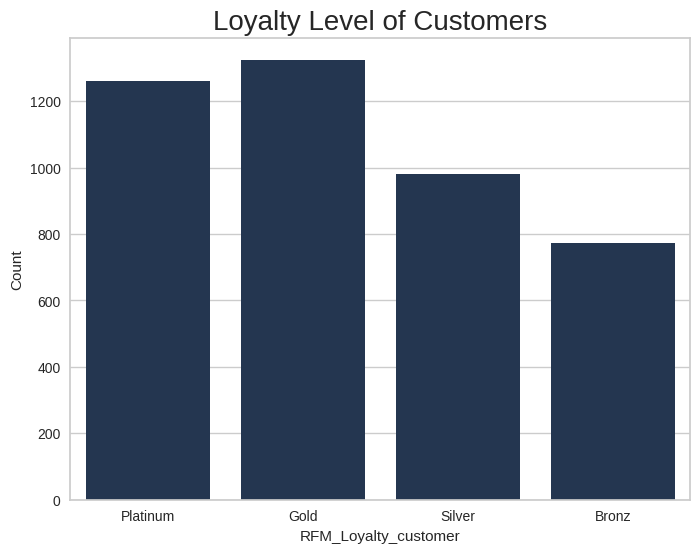

In [ ]:
# Plot the loyelty level
p = rfm_df.value_counts('RFM_Loyalty_customer')
plt.figure(figsize = (8,6))
sns.barplot(x = p.index.values, y = p.values, color='#1d3557')
plt.xlabel('RFM_Loyalty_customer')
plt.ylabel('Count')
plt.title('Loyalty Level of Customers', fontsize = 20)
plt.show()

In [ ]:
segmentation_customer=rfm_df[['Recency','Frequency','Monetary','RFM_Loyalty_customer']]

In [ ]:
segmentation_customer.groupby('RFM_Loyalty_customer').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                            mean min  max        mean min   max         mean   
RFM_Loyalty_customer                                                           
Platinum               19.550357   0  140  225.884219  20  7676  5253.556788   
Gold                   63.433962   0  372   57.012075   1   521  1162.987662   
Silver                125.178571   1  373   24.337755   1    98   579.452461   
Bronz                 217.585492  51  373   10.958549   1    39   199.030725   

                                               
                         min        max count  
RFM_Loyalty_customer                           
Platinum              316.25  280206.02  1261  
Gold                  114.34  168472.50  1325  
Silver                  6.90   77183.60   980  
Bronz                   3.75     660.00   772

**Observation :**
  * Platinum customers=1261 (less recency but high  frequency and heavy spendings)
  * Gold customers=1325 (good recency,frequncy and moentary)
  * Silver customers=980 (high recency, low frequency and low spendings)
  * Bronz customers=772 (very high recency but very less frequency and spendings)

The Platinum and Gold Customer category generates the majority of our revenue. In short term, we can concentrate on giving marketing effort to Enthusiastic & Middle Customers with a variety of promotion: We need to retail all of our customers, for instance by discounts, upselling, and cross-selling. Simply said, we should be aware of the reasons why customers leave or remain with our business, provide them loyalty programs tailored to their needs, and engage possible churn customers in discount promotions.

## Numeric Distribution & Outlier Handling

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

                ----------------- Distribution Plots for R,F,M -------------------------------


<Axes: xlabel='Monetary', ylabel='Density'>

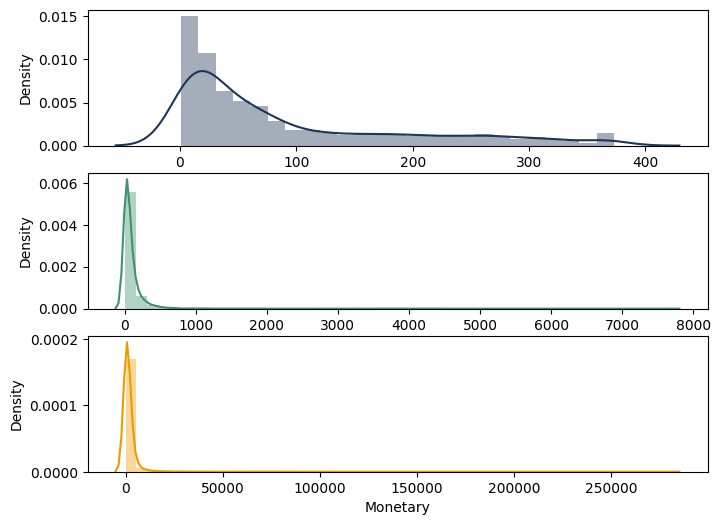

In [ ]:
print("                ----------------- Distribution Plots for R,F,M -------------------------------")

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(8,6))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'], color='#1d3557')
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'], color='#40916c')
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'], color='#ee9b00')

                ----------------- Box Plots for R,F,M -------------------------------


<Axes: xlabel='Monetary'>

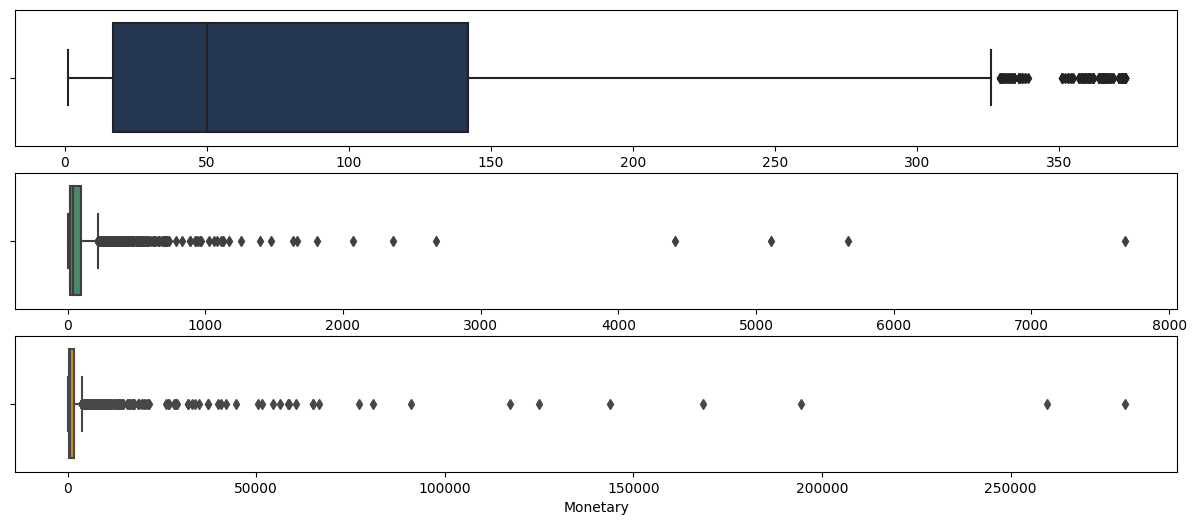

In [ ]:
print("                ----------------- Box Plots for R,F,M -------------------------------")

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(15,6))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.boxplot(x=rfm_df['Recency'], color='#1d3557')
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.boxplot(x=rfm_df['Frequency'], color='#40916c')
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.boxplot(x=rfm_df['Monetary'], color='#ee9b00')

*   ***Distribution of Recency, Frequency, and Monetary are right skewed.***
*   **The data are need outliers handling**

Since clustering algorithms require a normal distribution, normalization of the data is required.I am using Log transformation to deal with the skewness of data


                ----------------- Log Transformation Plots for R,F,M -------------------------------


<Axes: xlabel='log_Monetary', ylabel='Density'>

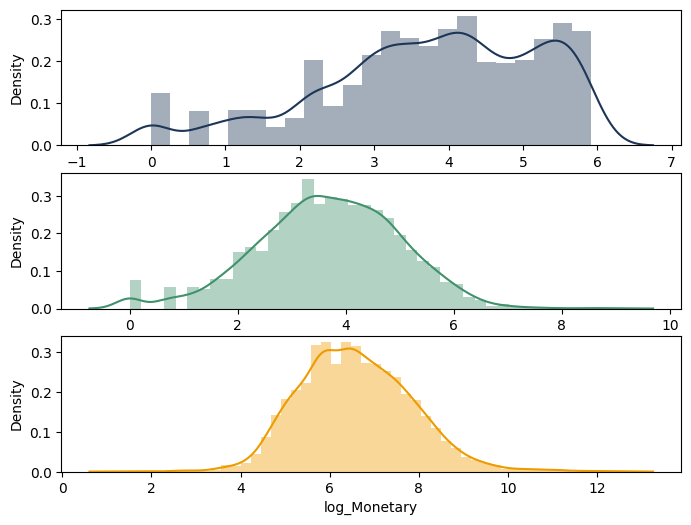

In [ ]:
# Taking Log of columns
rfm_df["log_Recency"] = np.log(rfm_df.Recency)
rfm_df["log_Frequency"] = np.log(rfm_df.Frequency)
rfm_df["log_Monetary"] = np.log(rfm_df.Monetary)

# Checking the distribution of Recency, Frequency and Monetary variables after log transformation
print("                ----------------- Log Transformation Plots for R,F,M -------------------------------")
plt.figure(figsize=(8,6))
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['log_Recency'], color='#1d3557')
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['log_Frequency'], color='#40916c')
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['log_Monetary'], color='#ee9b00')

                ----------------- Box Plots for R,F,M -------------------------------


<Axes: xlabel='log_Monetary'>

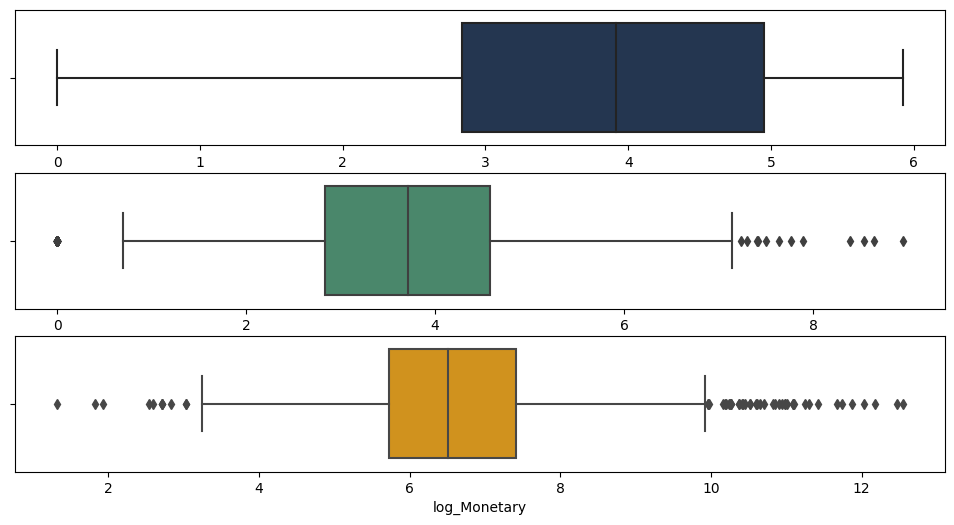

In [ ]:
print("                ----------------- Box Plots for R,F,M -------------------------------")

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,6))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.boxplot(x=rfm_df['log_Recency'], color='#1d3557')
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.boxplot(x=rfm_df['log_Frequency'], color='#40916c')
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.boxplot(x=rfm_df['log_Monetary'], color='#ee9b00')

# KMeans Clustering

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Scaling

In [ ]:
rfm_df_log = rfm_df[['log_Recency','log_Frequency','log_Monetary']]

In [ ]:
rfm_df_log.head()

,log_Recency,log_Frequency,log_Monetary
CustomerID,,,
12346.0,5.783825,0.000000,11.253942
12347.0,0.693147,5.204007,8.368693
12348.0,4.317488,3.433987,7.494007
12349.0,2.890372,4.290459,7.471676
12350.0,5.736572,2.833213,5.812338


In [ ]:
rfm_df_log.describe()

,log_Recency,log_Frequency,log_Monetary
count,4338.000000,4338.000000,4338.000000
mean,3.737133,3.671522,6.585704
std,1.474603,1.320854,1.261763
min,0.000000,0.000000,1.321756
25%,2.833213,2.833213,5.725161
50%,3.912023,3.713572,6.505141
75%,4.954060,4.584967,7.414933
max,5.921578,8.945854,12.543280


In [ ]:
# taking only values of recency and monetory in X.
X = rfm_df_log.values

# standardising the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Elbow Method

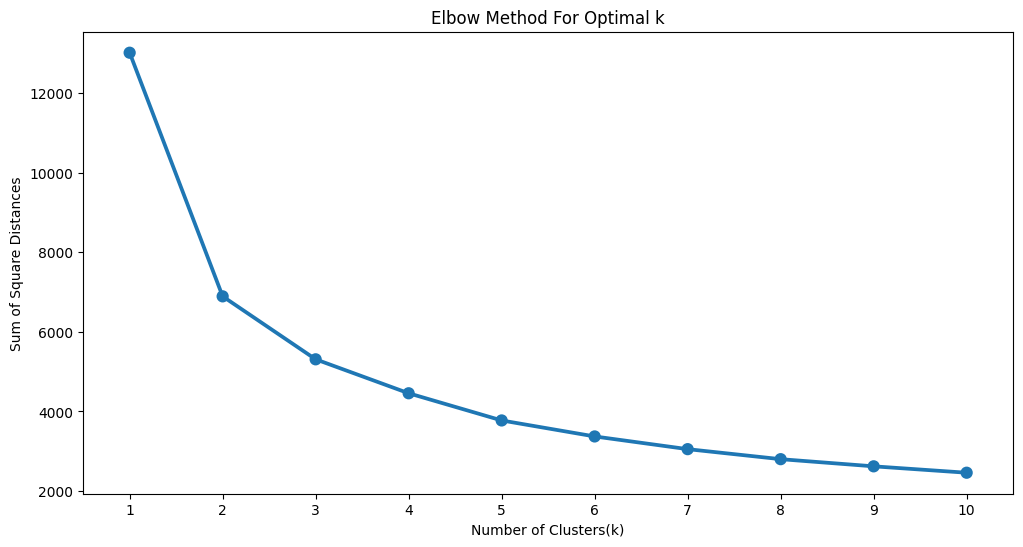

In [ ]:
wcss = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_std)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

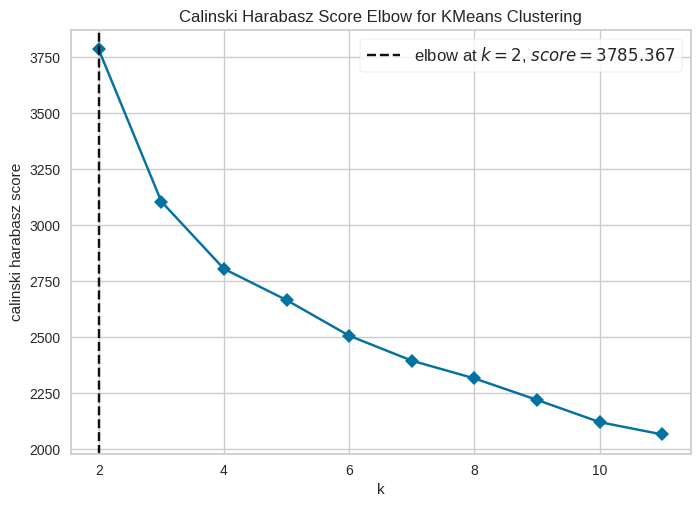

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

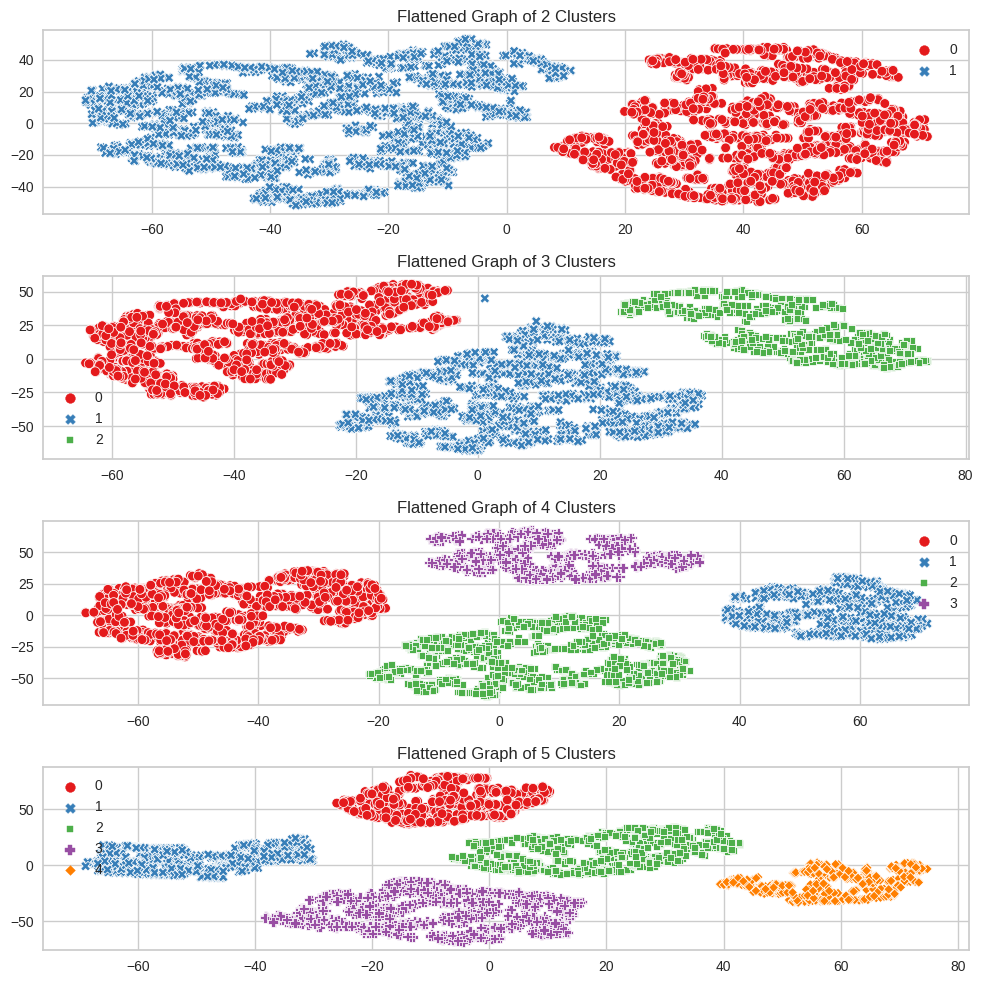

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
df_rfm_k3 = kmeans(X_std, 2, rfm_df_log)

plt.subplot(4, 1, 2)
df_rfm_k3 = kmeans(X_std, 3, rfm_df_log)

plt.subplot(4, 1, 3)
df_rfm_k4 = kmeans(X_std, 4, rfm_df_log)

plt.subplot(4, 1, 4)
df_rfm_k5 = kmeans(X_std, 5, rfm_df_log)

plt.tight_layout()

### Silhouette Score (Validating Above optimal cluster value (i.e optimal_cluster=2))

In [ ]:
#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3956448183902594
For n_clusters = 3, silhouette score is 0.306038948113428
For n_clusters = 4, silhouette score is 0.30937926922584036
For n_clusters = 5, silhouette score is 0.28117226129381556
For n_clusters = 6, silhouette score is 0.2853958827945987
For n_clusters = 7, silhouette score is 0.2678832513054903
For n_clusters = 8, silhouette score is 0.27107158383309105
For n_clusters = 9, silhouette score is 0.26889593666704287
For n_clusters = 10, silhouette score is 0.26353077141361997


[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Axes: >

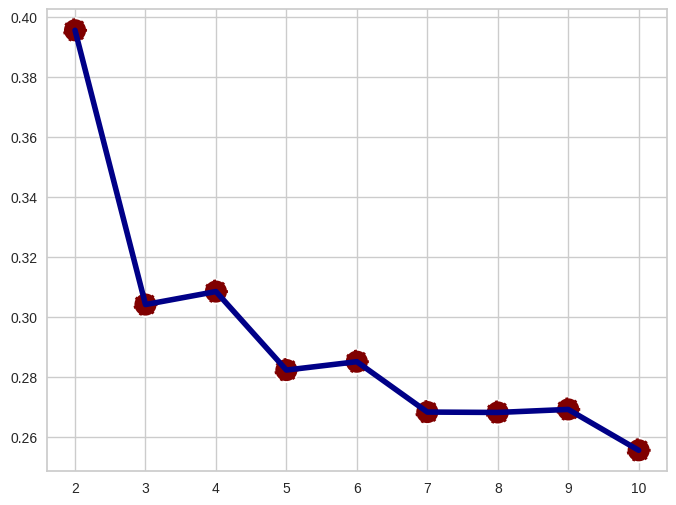

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(X)
    preds = kmeans.predict(X)

    score_euclidean = silhouette_score(X, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

**n_clusters=2 on Kmeans Model**

In [ ]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [ ]:
#Find the clusters for the observation given in the dataset
rfm_df['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_df.head(5)

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFM_Group,RFM_score,RFM_Loyalty_customer,log_Recency,log_Frequency,log_Monetary,Cluster_based_on_freq_mon_rec
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1


In [ ]:
data_process_normalized=rfm_df[['Recency','Frequency','Monetary','log_Recency','log_Frequency','log_Monetary','RFM_Loyalty_customer','Cluster_based_on_freq_mon_rec']]

In [ ]:
data_process_normalized.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency            \
                                     mean min  max        mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                               25.081465   1  372  177.574631   1  7676   
1                              140.898764   1  373   27.065763   1   232   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                              4124.197333  120.03  280206.02  1829  
1                               535.692297    3.75   77183.60  2509

* ***Cluster 0 has low recency rate but very high frequency and monetary. Cluster 0 conatins 1829 customers. Thus generates more revenue to the retail business***
* ***Cluster 1 has high recency rate but they are low frequent buyers and spends very low money than other customers as mean monetary value is very low.***